<a href="https://colab.research.google.com/github/ymamathasai/DSDM-725/blob/main/Lab3/Bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import csv
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("https://github.com/albanda/CE888/blob/master/lab3/bank-additional-full.csv?raw=true", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df_new = df.apply(LabelEncoder().fit_transform)
df_new

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,334,0,26,0,1,5,25,0,171,0,1
41184,29,1,1,5,0,0,0,0,7,0,383,0,26,0,1,5,25,0,171,0,0
41185,39,5,1,6,0,2,0,0,7,0,189,1,26,0,1,5,25,0,171,0,0
41186,27,9,1,5,0,0,0,0,7,0,442,0,26,0,1,5,25,0,171,0,1


In [6]:
df_new = df_new.drop(['duration'], axis=1)
df_new

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,0,26,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,0,26,0,1,5,25,0,171,0,1
41184,29,1,1,5,0,0,0,0,7,0,0,26,0,1,5,25,0,171,0,0
41185,39,5,1,6,0,2,0,0,7,0,1,26,0,1,5,25,0,171,0,0
41186,27,9,1,5,0,0,0,0,7,0,0,26,0,1,5,25,0,171,0,1


In [7]:
df_new.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

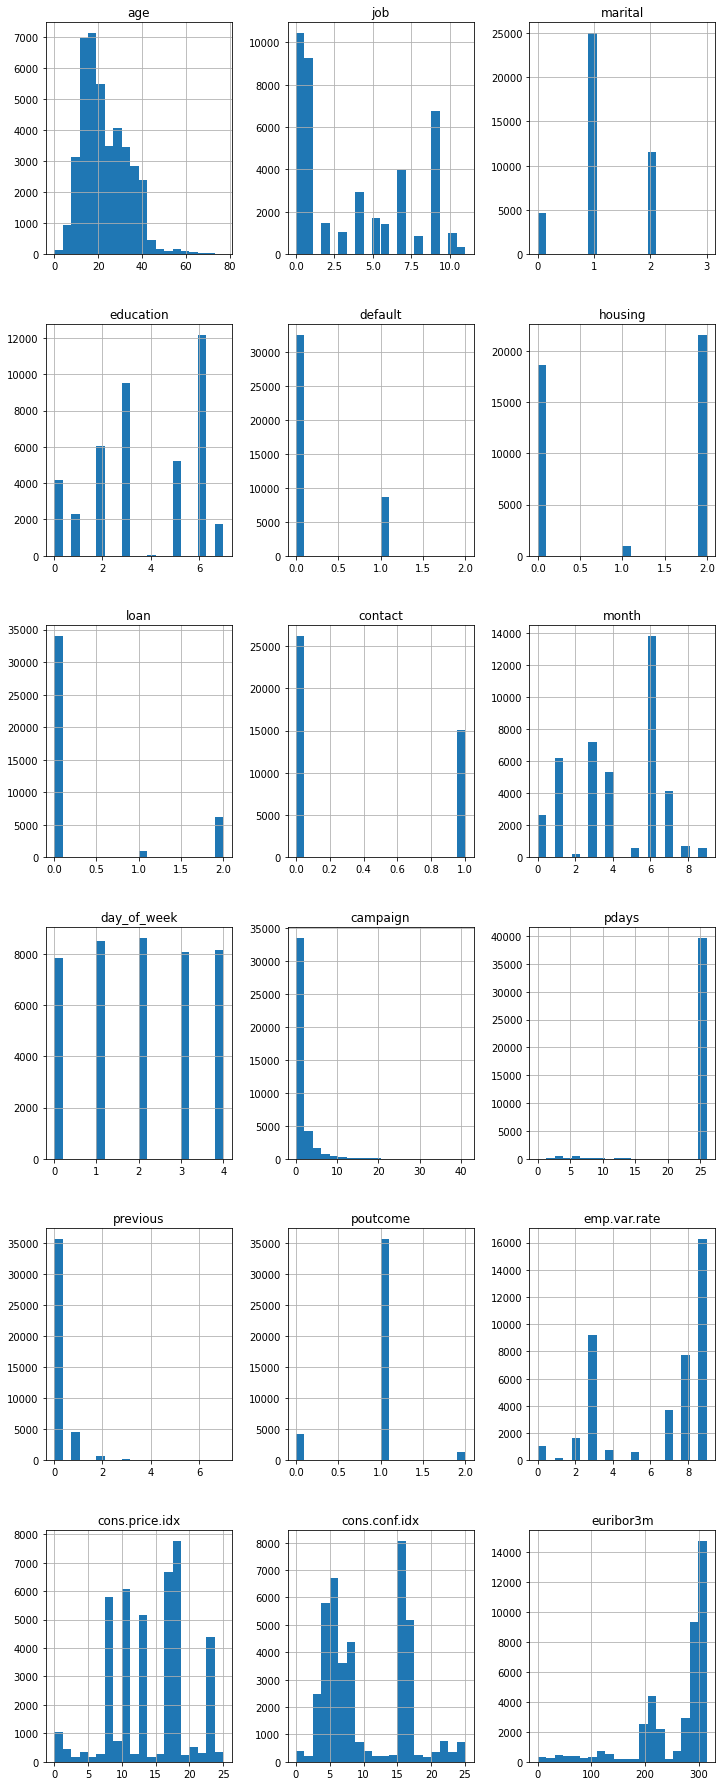

In [8]:
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(df_new.columns)//3, 3, figsize=(12, 32))

i = 0
for t_axis in axes:
    for axis in t_axis:
        df_new.hist(column = df_new.columns[i], bins = 20, ax=axis)
        i = i+1

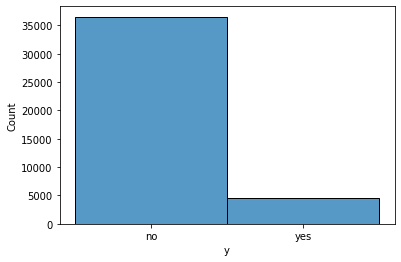

In [9]:
y = df['y']
sns_plot = sns.histplot(y, kde=False)

In [10]:
X, Y = df_new.iloc[:, :-1], df_new.iloc[:, -1]
X = X.values
Y = Y.values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state = 50)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score as acc
import numpy as np
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
clf = RandomForestClassifier(n_estimators = 300, max_depth = 12, class_weight='balanced', random_state = 60)
cv = StratifiedKFold(n_splits=10, shuffle=True)
clf.fit(X_train, Y_train)
#scores = cross_val_score(clf, X_train, Y_train, scoring=make_scorer(acc), cv=cv)
#print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))
scores = cross_val_score(clf, X_train, Y_train, scoring='f1', cv=cv)
print('f1_score: %.2f (%.2f)' % (np.mean(scores), np.std(scores)))

f1_score: 0.49 (0.02)


In [33]:
from sklearn.dummy import DummyRegressor, DummyClassifier
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X, Y)
print("Dummy ACC: %.2f" % acc(Y, dummy_clf.predict(X)))
d_scores = cross_val_score(dummy_clf, X_train, Y_train, cv=10, scoring='f1')
print('f1: %.2f (%.2f)' % (np.mean(d_scores), np.std(d_scores)))

Dummy ACC: 0.80
f1: 0.12 (0.01)


In [25]:
random_forest_classifier=RandomForestClassifier(random_state=50)
param_grid = {'n_estimators': [50, 100], 'max_features': ['auto', 'sqrt','log2'], 'max_depth' : [4,5,6,7], 'criterion' :['gini', 'entropy']}

In [27]:
from sklearn.model_selection import GridSearchCV
random_forest_classifier_grid = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, cv=cv)
random_forest_classifier_grid.fit(X_train, Y_train)
random_forest_classifier_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 50}

In [40]:
random_forest=RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 50, max_depth=7, criterion='entropy')
random_forest.fit(X_train, Y_train)
scores = cross_val_score(random_forest, X_train, Y_train, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.900 (0.003)


In [43]:
random_forest_diff=RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 150, max_depth=6, criterion='entropy')
random_forest_diff.fit(X_train, Y_train)
scores = cross_val_score(random_forest_diff, X_train, Y_train, scoring='f1', cv=cv)
print('f1_score: %.2f (%.2f)' % (np.mean(scores), np.std(scores)))

f1_score: 0.30 (0.02)


In [50]:
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")
features = df_new.columns
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

[17 18 14 11 16 13 15  8  0 12  9  7 10  3  1  4  2  5  6]
Feature ranking:
1. euribor3m (0.241526)
2. nr.employed (0.166756)
3. emp.var.rate (0.134835)
4. pdays (0.113657)
5. cons.conf.idx (0.061036)
6. poutcome (0.053632)
7. cons.price.idx (0.049894)
8. month (0.047673)
9. age (0.031740)
10. previous (0.021591)
11. day_of_week (0.015590)
12. contact (0.014659)
13. campaign (0.011003)
14. education (0.009704)
15. job (0.009080)
16. default (0.007218)
17. marital (0.004690)
18. housing (0.002919)
19. loan (0.002797)


In [52]:
random_forest_diff2=RandomForestClassifier(random_state=60, max_features='auto', n_estimators= 100, max_depth=12, criterion='entropy')
random_forest_diff2.fit(X_train, Y_train)
scores2 = cross_val_score(random_forest_diff2, X_train, Y_train, scoring='f1', cv=cv)
print('f1_score: %.2f (%.2f)' % (np.mean(scores2), np.std(scores2)))

f1_score: 0.36 (0.02)


In [53]:
random_forest_diff3=RandomForestClassifier(random_state=60, max_features='auto', n_estimators= 400, max_depth=6, criterion='entropy')
random_forest_diff3.fit(X_train, Y_train)
scores3 = cross_val_score(random_forest_diff3, X_train, Y_train, scoring='f1', cv=cv)
print('f1_score: %.2f (%.2f)' % (np.mean(scores3), np.std(scores3)))

f1_score: 0.30 (0.03)


In [54]:
importances = random_forest_diff3.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_diff3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")
features = df_new.columns
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

[18 17 14 11 16 13 15  8  7  0 12  9 10  4  3  1  2  5  6]
Feature ranking:
1. nr.employed (0.237835)
2. euribor3m (0.197243)
3. emp.var.rate (0.130094)
4. pdays (0.095010)
5. cons.conf.idx (0.085292)
6. poutcome (0.069132)
7. cons.price.idx (0.054920)
8. month (0.041318)
9. contact (0.018933)
10. age (0.017971)
11. previous (0.012037)
12. day_of_week (0.010473)
13. campaign (0.007615)
14. default (0.005946)
15. education (0.005849)
16. job (0.004809)
17. marital (0.002893)
18. housing (0.001444)
19. loan (0.001188)
